In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import cv2
from sklearn import svm
from matplotlib import pyplot as plt
from skimage import feature
from sklearn.metrics import accuracy_score
import os
import sys


(1556, 128, 128)

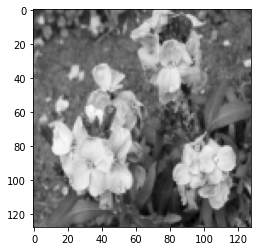

In [ ]:
#please enter your path here
path = '/content/drive/My Drive/ECSE415/flower_subset.npz'
train_images = np.load(path)['train_images']
train_labels = np.load(path)['train_labels']
test_images = np.load(path)['test_images']
test_labels = np.load(path)['test_labels']
plt.imshow(train_images[0], cmap='gray')
train_images.shape

(90, 64, 64)


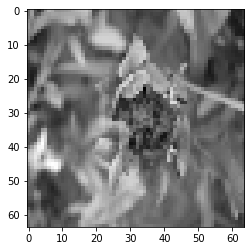

In [ ]:
width = 64
height = 64
train_resize = np.zeros((len(train_images), width, height))
test_resize = np.zeros((len(test_images), width, height))
##should resize with sklearn

for i in range(len(train_images)):
    img = train_images[i, :, :]
    img_sm = cv2.resize(img, (width, height), interpolation=cv2.INTER_CUBIC)
    train_resize[i, :, :] = img_sm

for i in range(len(test_images)):
    img = test_images[i, :, :]
    img_sm = cv2.resize(img, (width, height), interpolation=cv2.INTER_CUBIC)
    test_resize[i, :, :] = img_sm
  
print(test_resize.shape)
plt.imshow(train_resize[55], cmap='gray')


In [ ]:
# returns HoG features, and orderd features
def HoG_features(images, feature_size):
    cell_size = (8,8)
    block_size = (4,4)
    nbins = 4

    # applying a thresholding of 255 as all images are between [0:1]
    images = images*255

    # all images have same shape
    img_size = images[0].shape

    # creating HoG object
    hog = cv2.HOGDescriptor(_winSize=(img_size[1] // cell_size[1] * cell_size[1],
                                    img_size[0] // cell_size[0] * cell_size[0]),
                            _blockSize=(block_size[1] * cell_size[1],
                                        block_size[0] * cell_size[0]),
                            _blockStride=(cell_size[1], cell_size[0]),
                            _cellSize=(cell_size[1], cell_size[0]),
                            _nbins=nbins)

    # features = np.zeros((N, feature_size))
    features = []
    for i in range(images.shape[0]):
        
        # Compute HoG features
        features.append(hog.compute((images[i]).astype(np.uint8)).reshape(1, -1))
    
    # Stack arrays in sequence vertically 
    features = np.vstack(features)
   
    return features

In [ ]:
train_f = HoG_features(train_resize, 1600)
test_f = HoG_features(test_resize, 1600)
train_f.shape

(1556, 1600)

In [ ]:
def Non_Linear_SVM(train_f, train_labels, test_f, test_labels, gamma, C, random_state=None):
    # creating non-linear svc object, RBF kernel is default
    clf = svm.SVC(C=C, gamma=gamma, random_state=random_state)

    # fit and predict
    clf.fit(train_features, train_labels)
    predict = clf.predict(test_features)
    
    # using accruacy score from metrics lib and multiply 100 to get precentage
    accuracy = accuracy_score(test_labels, predict)*100

    return accuracy

In [ ]:
#Fitting a non-linear SVM classifier (use RBF kernel with gamma=‘auto’ and C=1) on the features and the class labels of the training images.
clf = svm.SVC(C=1, gamma='auto', random_state=None)
clf.fit(train_f, train_labels)
pred = clf.predict(test_f)
accuracy = accuracy_score(test_labels, pred)*100

In [ ]:
#trying out different values for C and gamma, setting C to 1 and gamma to scale gives an accuracy of 57.7
clf = svm.SVC(C=1, gamma='scale', random_state=None)
clf.fit(train_f, train_labels)
pred = clf.predict(test_f)
accuracy = accuracy_score(test_labels, pred)*100

Accuracy for svm after tweaking

In [ ]:
print(accuracy)

57.77777777777777


In [ ]:
#####Random Forest classifier#####
from sklearn.ensemble import RandomForestClassifier
#Fittig a Random Forest(RF) classifier (set n estimators=10, max depth=5 and criterion=‘entropy’) on the features and the class labels of the training images.
clf = RandomForestClassifier(n_estimators=10, max_depth=5, criterion='entropy', random_state=None)
clf.fit(train_f, train_labels)
pred = clf.predict(test_f)
acc = accuracy_score(test_labels, pred)*100

print(acc)

34.44444444444444


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Fitting a Random Forest(RF) classifier (set n estimators=70, max depth=7 and criterion=‘entropy’) on the features and the class labels of the training images.
clf = RandomForestClassifier(n_estimators=70, max_depth=7, criterion='entropy', random_state=None)
clf.fit(train_f, train_labels)
pred = clf.predict(test_f)
acc = accuracy_score(test_labels, pred)*100
print(acc)

47.77777777777778


In [142]:
from sklearn.ensemble import RandomForestClassifier
#Fitting a Random Forest(RF) classifier (set n estimators=50, max depth=20 and criterion=‘entropy’) on the features and the class labels of the training images.
clf = RandomForestClassifier(n_estimators=50, max_depth=20, criterion='entropy', random_state=None)
clf.fit(train_f, train_labels)
pred = clf.predict(test_f)
acc = accuracy_score(test_labels, pred)*100

print(acc)

46.666666666666664


In [141]:
from sklearn.ensemble import RandomForestClassifier
#Fitting a Random Forest(RF) classifier (set n estimators=50, max depth=19 and criterion=‘entropy’) on the features and the class labels of the training images.
clf = RandomForestClassifier(n_estimators=50, max_depth=19, criterion='entropy', random_state=None)
clf.fit(train_f, train_labels)
pred = clf.predict(test_f)
acc = accuracy_score(test_labels, pred)*100

print(acc)

46.666666666666664


##SVM provides better results. SVM is more stable